In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import numpy as np

# Hi Friends, Fill this out and then run all cells.
ticker_name = 'AMZN'
policy_distillation_folder = 'policy_distillation_*' + ticker_name + '*'
multitask_folder = 'multitask_*' + ticker_name + '*'
baseline_df = pd.read_csv('data/' + ticker_name + '.csv')
baseline_df['date']= pd.to_datetime(baseline_df['Date'], format='%Y-%m-%d')



In [2]:
policy_logdirs = []
for path in glob.glob(policy_distillation_folder + '/account_value_trade_*' + ticker_name + '_*.csv'):
    policy_logdirs.append([path, int(path.split('_')[-1][:-4])])
policy_logdirs = sorted(policy_logdirs, key=lambda x: x[1])
policy_logdirs

[['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_0.csv',
  0],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_2.csv',
  2],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_4.csv',
  4],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_6.csv',
  6],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_8.csv',
  8],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_10.csv',
  10],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_12.csv',
  12],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trade_policy distillation_AMZN_14.csv',
  14],
 ['policy_distillation_GOOG_AMZN_MSFT_20160101-20200508/account_value_trad

In [5]:
multi_logdirs = []
for path in glob.glob(multitask_folder + '/account_value_trade_*' + ticker_name + '_*.csv'):
    multi_logdirs.append([path, int(path.split('_')[-1][:-4])])
multi_logdirs = sorted(multi_logdirs, key=lambda x: x[1])
multi_logdirs

[['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_0.csv',
  0],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_2.csv',
  2],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_4.csv',
  4],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_6.csv',
  6],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_8.csv',
  8],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_10.csv',
  10],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_12.csv',
  12],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_14.csv',
  14],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_16.csv',
  16],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_18.csv',
  18],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_trade_multitask_AMZN_20.csv',
  20],
 ['multitask_GOOG_AMZN_MSFT_test_nr/account_value_tra

In [6]:
dfs = []
for i in range(len(policy_logdirs)):
    policy_log = policy_logdirs[i]
    multi_log = multi_logdirs[i]
    df = pd.read_csv(policy_log[0])
    df = df.iloc[1:]
    df2 = pd.read_csv(multi_log[0])
    df2 = df2.iloc[1:]
    combo = df.merge(df2, on='date')
    dfs.append(combo)

In [8]:
mega_df = pd.concat(dfs)
mega_df['date'] = pd.to_datetime(mega_df['date'], format='%Y%m%d')
mega_df = mega_df.merge(baseline_df, on='date')
mega_df

,Unnamed: 0_x,date,assets_x,Unnamed: 0_y,assets_y,Date,Open,High,Low,Close,Adj Close,Volume
0,1,2016-01-05,9.998914e+05,1,9.997152e+05,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600
1,1,2016-01-07,9.984421e+05,1,1.049479e+06,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900
2,1,2016-01-11,9.992824e+05,1,1.089581e+06,2016-01-11,612.479980,619.849976,598.570007,617.739990,617.739990,4891600
3,1,2016-01-13,9.951919e+05,1,1.085331e+06,2016-01-13,620.880005,620.880005,579.159973,581.809998,581.809998,7655200
4,1,2016-01-15,9.932121e+05,1,1.134717e+06,2016-01-15,572.239990,584.619995,565.299988,570.179993,570.179993,7784500
...,...,...,...,...,...,...,...,...,...,...,...,...
542,1,2020-04-27,3.802858e+06,1,1.562665e+06,2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,2376.000000,5645600
543,1,2020-04-29,3.796387e+06,1,1.751054e+06,2020-04-29,2330.010010,2391.889893,2310.000000,2372.709961,2372.709961,4591600
544,1,2020-05-01,3.655853e+06,1,1.731833e+06,2020-05-01,2336.800049,2362.439941,2258.189941,2286.040039,2286.040039,9772600
545,1,2020-05-05,3.706368e+06,1,1.909757e+06,2020-05-05,2340.000000,2351.000000,2307.129883,2317.800049,2317.800049,3242500


In [9]:
starting_shares = 1000000 / mega_df['Close'][0]
mega_df['baseline'] = starting_shares * mega_df['Close']

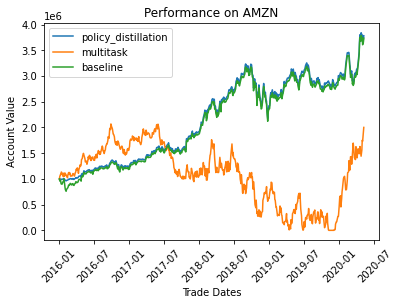

In [10]:
plt.plot(mega_df['date'], mega_df['assets_x'], label='policy_distillation')
plt.plot(mega_df['date'], mega_df['assets_y'], label='multitask')
plt.plot(mega_df['date'], mega_df['baseline'], label='baseline')
plt.title('Performance on ' + ticker_name)
plt.xlabel('Trade Dates')
plt.ylabel('Account Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()